In [32]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('clean_accidents.csv')
Totals = pd.read_csv("total flights 1970 to 2021.csv")

In [26]:
Totals.head(1)

,Years,Total_fatalities,Annual_Flights,Total_psgr,avg_psgr,fatalities_percentage
0,1970,1920,57194870.0,1861543452,32.55,0.000103


In [22]:
Fatalities.head(1)

,date,location,operator,route,type,total_aboard,passengers_aboard,crew_aboard,total_fatalities,passengers_fatalities,crew_fatalities,ground,summary,category,flight_type,survival_rate
0,1908-09-17 17:18:00,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",falla,Militar,50.0


In [5]:

Totals.dtypes

Years                      int64
Total_fatalities           int64
Annual_Flights           float64
Total_psgr                 int64
avg_psgr                 float64
fatalities_percentage    float64
dtype: object

In [9]:
Fatalities.dtypes

date                     datetime64[ns]
location                         object
operator                         object
route                            object
type                             object
total_aboard                      int64
passengers_aboard                 int64
crew_aboard                       int64
total_fatalities                  int64
passengers_fatalities             int64
crew_fatalities                   int64
ground                            int64
summary                          object
category                         object
flight_type                      object
survival_rate                   float64
dtype: object

In [ ]:
Totals["Years"] = pd.to_datetime(Totals["Years"], format='%Y-%m-%d')

# Convert "date" column in Fatalities dataframe to datetime
Fatalities["date"] = pd.to_datetime(Fatalities["date"], format='%Y-%m-%d')

# Filter Fatalities dataframe for years starting from 1970
Fatalities = Fatalities[Fatalities['date'].dt.year >= 1970]

# Group Fatalities by year and sum total fatalities
fatalities_per_year = Fatalities.groupby(Fatalities['date'].dt.year)['total_fatalities'].sum().reset_index()

# Rename columns in fatalities_per_year dataframe
fatalities_per_year.rename(columns={'date': 'Years', 'total_fatalities': 'Total_fatalities'}, inplace=True)

# Convert "Years" column in fatalities_per_year dataframe to datetime
fatalities_per_year["Years"] = pd.to_datetime(fatalities_per_year["Years"], format='%Y')

# Merge fatalities_per_year and Totals dataframes based on "Years"
combined_data = pd.merge(fatalities_per_year, Totals, on='Years', how='inner')

In [10]:
combined_data.dtypes

Years               datetime64[ns]
Total_fatalities             int64
Annual_Flights             float64
Total_psgr                   int64
avg_psgr                   float64
dtype: object

In [11]:
combined_data['fatalities_percentage'] = round((combined_data['Total_fatalities'] / combined_data['Total_psgr']) * 100,8)

In [12]:
combined_data.head(1)

,Years,Total_fatalities,Annual_Flights,Total_psgr,avg_psgr,fatalities_percentage
0,1970-01-01,1920,57194870.0,1861543452,32.55,0.000103


In [18]:
#combined_data.to_csv('fatalities 70 21.csv')

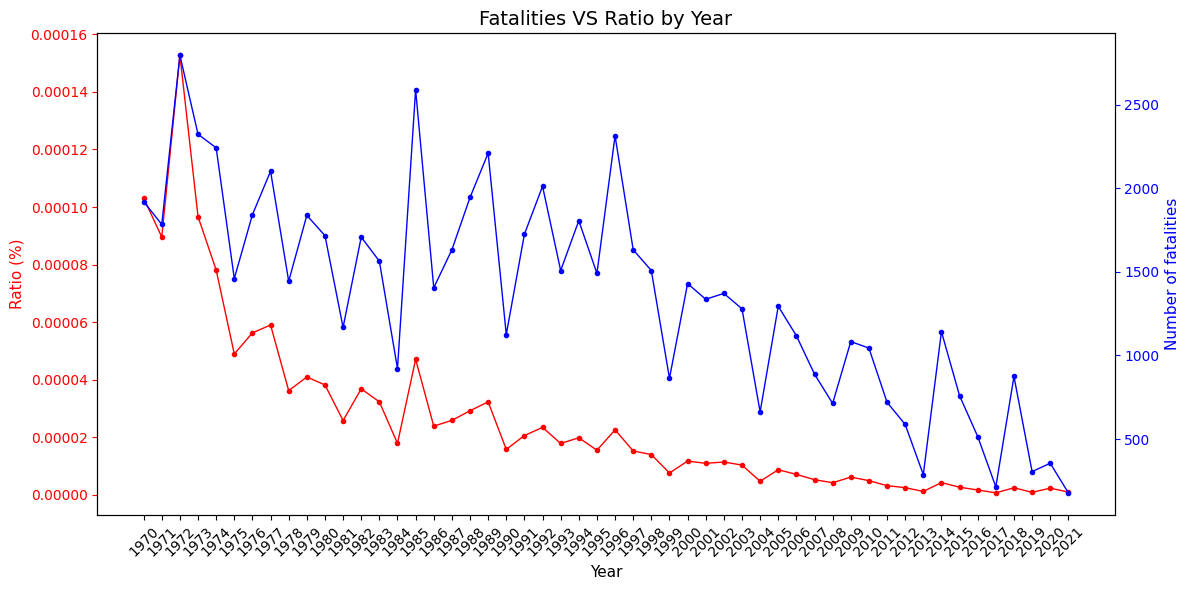

In [27]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.subplots()
ax1.plot(Totals['Years'], 'fatalities_percentage', data=Totals, color='red', marker='.', linewidth=1)
ax1.set_xlabel('Year', fontsize=11)
ax1.set_xticks(Totals['Years'])
ax1.set_xticklabels(Totals['Years'], rotation=45)  # Set the tick labels to the 'years' column with rotation
ax1.set_ylabel('Ratio (%)', color='red', fontsize=11)
ax1.tick_params('y', colors='red')

ax2 = ax1.twinx()
ax2.plot(Totals['Years'], 'Total_fatalities', data=Totals, color='blue', marker='.', linewidth=1)
ax2.set_ylabel('Number of fatalities', color='blue', fontsize=11)
ax2.tick_params('y', colors='blue')

plt.title('Fatalities VS Ratio by Year', loc='Center', fontsize=14)
fig.tight_layout()
plt.show()

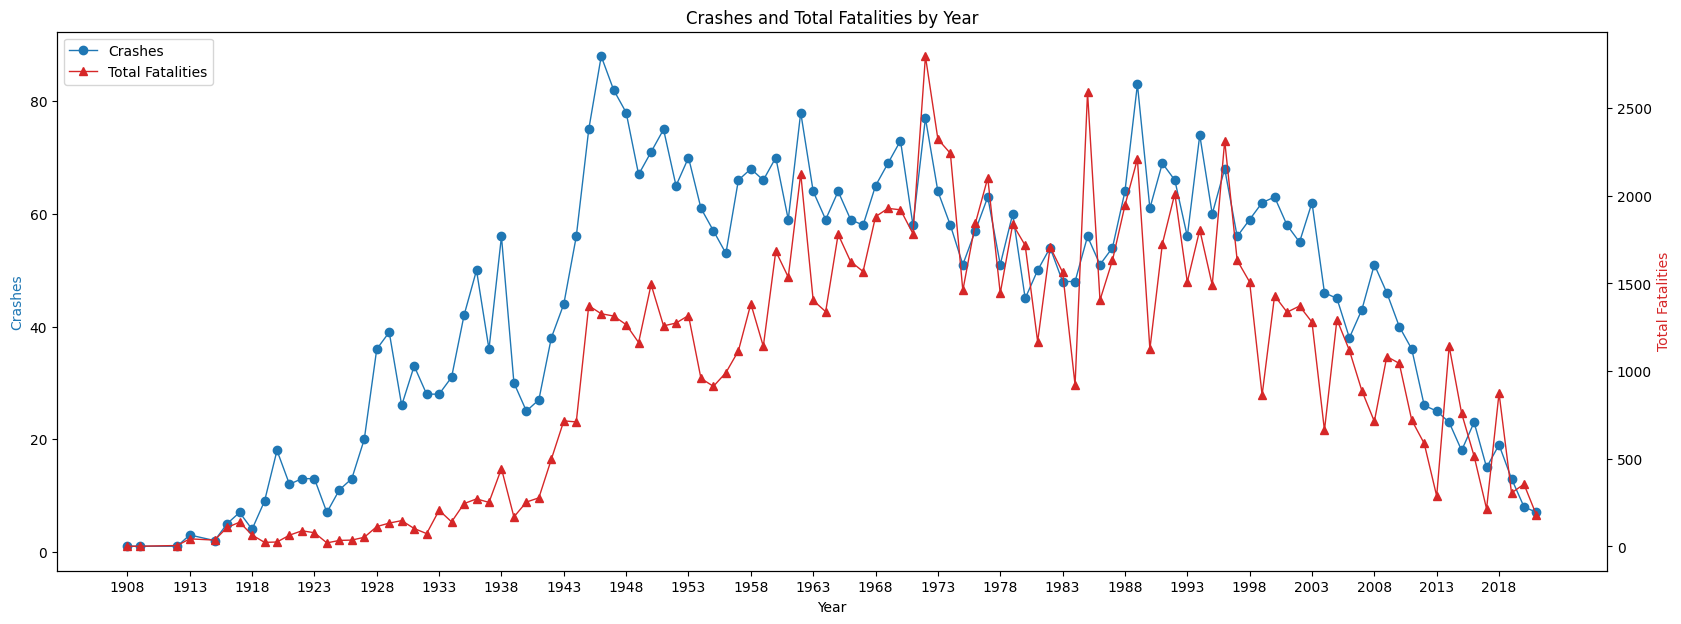

In [35]:
# Calculate crashes by year
crashes_by_year = df['date'].dt.year.value_counts().sort_index()

# Calculate total fatalities by year
fatalities_by_year = df.groupby(df['date'].dt.year)['total_fatalities'].sum()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(20, 7))

# Plot crashes on left y-axis
ax1.plot(crashes_by_year.index, crashes_by_year.values, marker='o', linewidth=1, label='Crashes')
ax1.set_xlabel('Year')
ax1.set_ylabel('Crashes', color='tab:blue')
ax1.set_title('Crashes and Total Fatalities by Year')

# Create a second y-axis for total fatalities
ax2 = ax1.twinx()

# Plot total fatalities on right y-axis with triangle marker
ax2.plot(fatalities_by_year.index, fatalities_by_year.values, marker='^', linewidth=1, color='tab:red', label='Total Fatalities')
ax2.set_ylabel('Total Fatalities', color='tab:red')

# Combine the legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set x-axis tick locations and labels
years = np.arange(crashes_by_year.index.min(), crashes_by_year.index.max() + 1, 5)
ax1.set_xticks(years)

plt.show()

Text(0.5, 1.0, 'Count of accidents by Month')

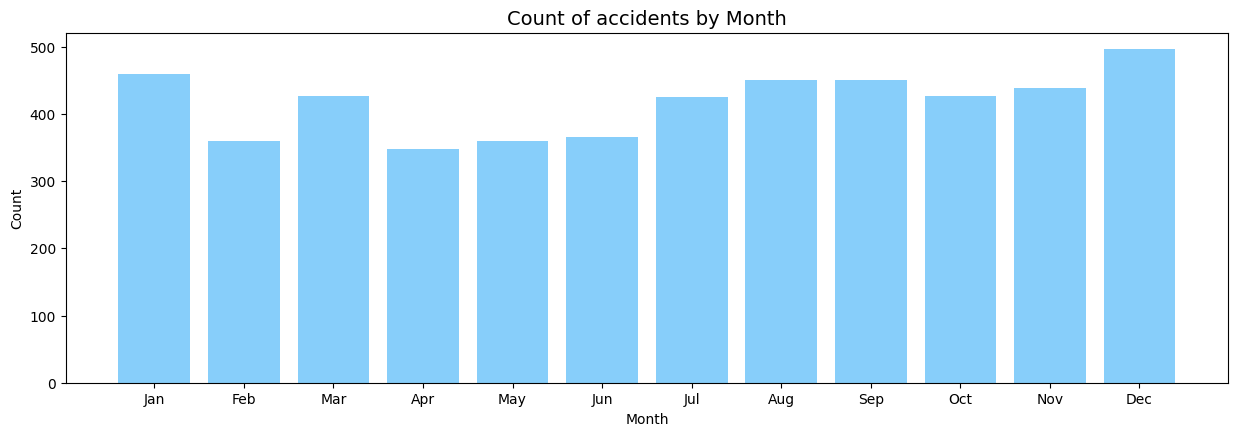

In [36]:
gs = plt.GridSpec(2, 2)
plt.figure(figsize=(15, 10))

ax = plt.subplot(gs[0, :])  # row 0, col 0
monthly_counts = df.groupby(df['date'].dt.month)['date'].count()

plt.bar(monthly_counts.index, monthly_counts.values, color='lightskyblue', linewidth=2)
plt.xticks(monthly_counts.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

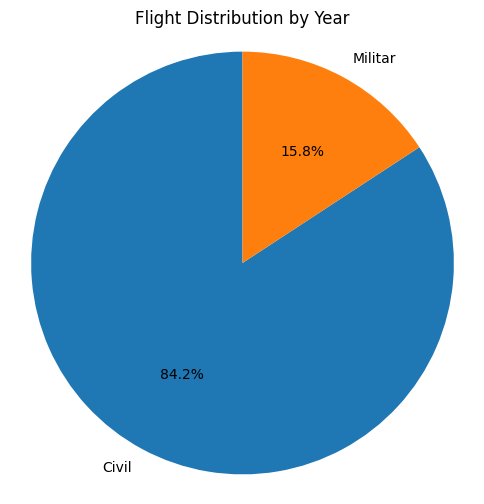

In [51]:
# Filter the data based on the year
filtered_data = df['date'].dt.year

# Count the occurrences of military and civil flights in the filtered data
flight_counts = df['flight_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(flight_counts, labels=flight_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Flight Distribution between military and civilian flights')
plt.axis('equal')

# Display the pie chart
plt.show()

In [68]:
df.head(1)


,total_aboard,total_fatalities,Proportion
date,,,
1908,2,1,0.5


In [64]:
df.dtypes

date                     datetime64[ns]
location                         object
operator                         object
route                            object
type                             object
total_aboard                      int64
passengers_aboard                 int64
crew_aboard                       int64
total_fatalities                  int64
passengers_fatalities             int64
crew_fatalities                   int64
ground                            int64
summary                          object
category                         object
flight_type                      object
survival_rate                   float64
dtype: object

In [70]:
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')

Text(0.5, 1.0, 'Total Number of People Involved by Year')

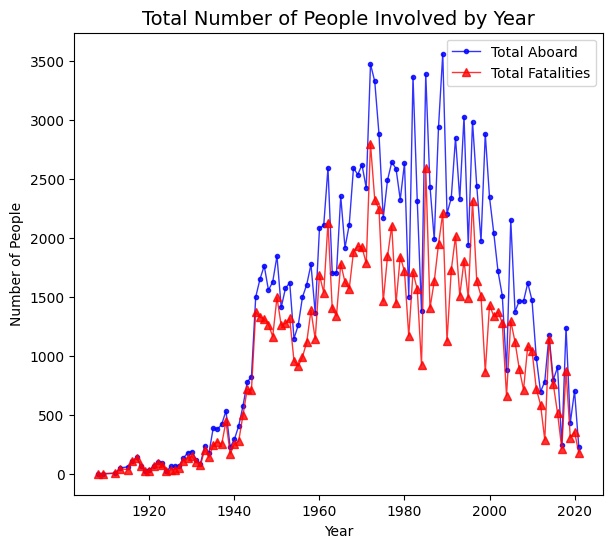

In [65]:
# Create df DataFrame
df = df.groupby(df['date'].dt.year)[['total_aboard', 'total_fatalities']].sum()
# Create Proportion column
df['Proportion'] = df['total_fatalities'] / df['total_aboard']

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(df.index, 'total_aboard', data=df, marker=".", color="blue", alpha=0.8, linewidth=1)
plt.plot(df.index, 'total_fatalities', data=df, color="red", marker="^", alpha=0.8, linewidth=1)
plt.legend(['Total Aboard', 'Total Fatalities'], fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of People', fontsize=10)
plt.title('Total Number of People Involved by Year', loc='Center', fontsize=14)

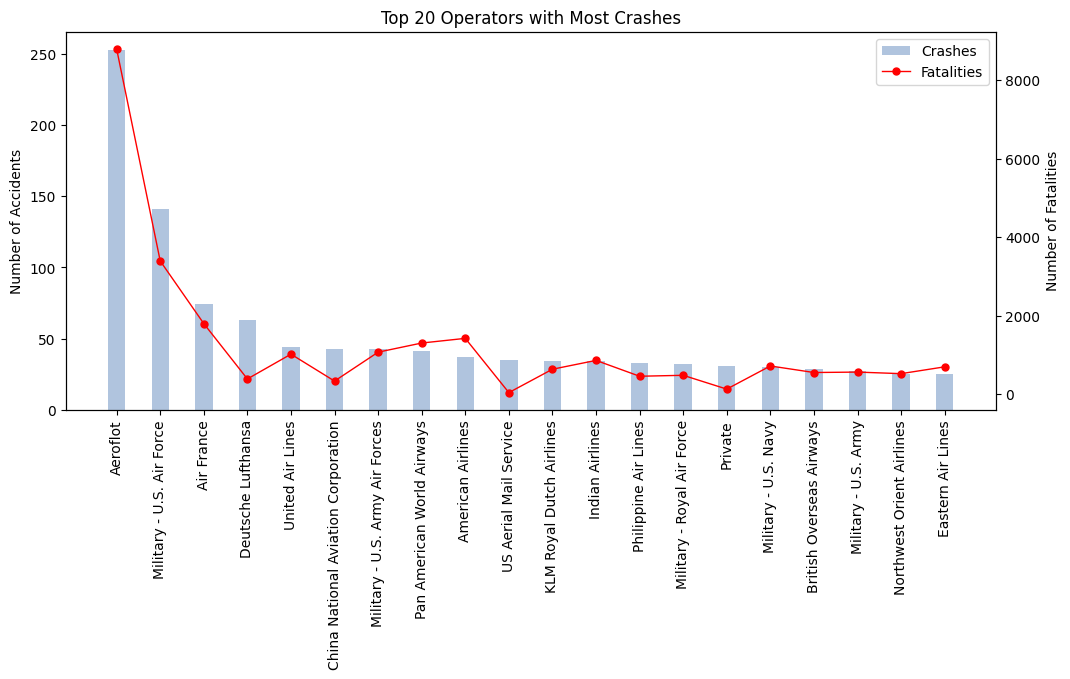

In [72]:
# Calculate the amount of crashes by operator
operator_counts = df['operator'].value_counts()

# Select the top 20 operators with the most crashes
top_20_operators = operator_counts.head(20)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar for crashes on the left y-axis
ax1.bar(top_20_operators.index, top_20_operators.values, width=0.4, align='center', color='lightsteelblue', label='Crashes')
ax1.set_ylabel('Number of Accidents')

# Create a twin y-axis for fatalities
ax2 = ax1.twinx()

# Group the data by operator and calculate the sum of total_fatalities
fatalities_by_operator = df.groupby('operator')['total_fatalities'].sum()

# Plot the line for fatalities on the right y-axis
ax2.plot(fatalities_by_operator.loc[top_20_operators.index], color='red', marker='o', markersize=5, linewidth=1, label='Fatalities')
ax2.set_ylabel('Number of Fatalities')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(top_20_operators.index)))
ax1.set_xticklabels(top_20_operators.index, rotation=90)

# Set the title
ax1.set_title('Top 20 Operators with Most Crashes')

# Combine the legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Adjust the spacing between bars on the x-axis
plt.subplots_adjust(bottom=0.25)

# Display the graph
plt.show()

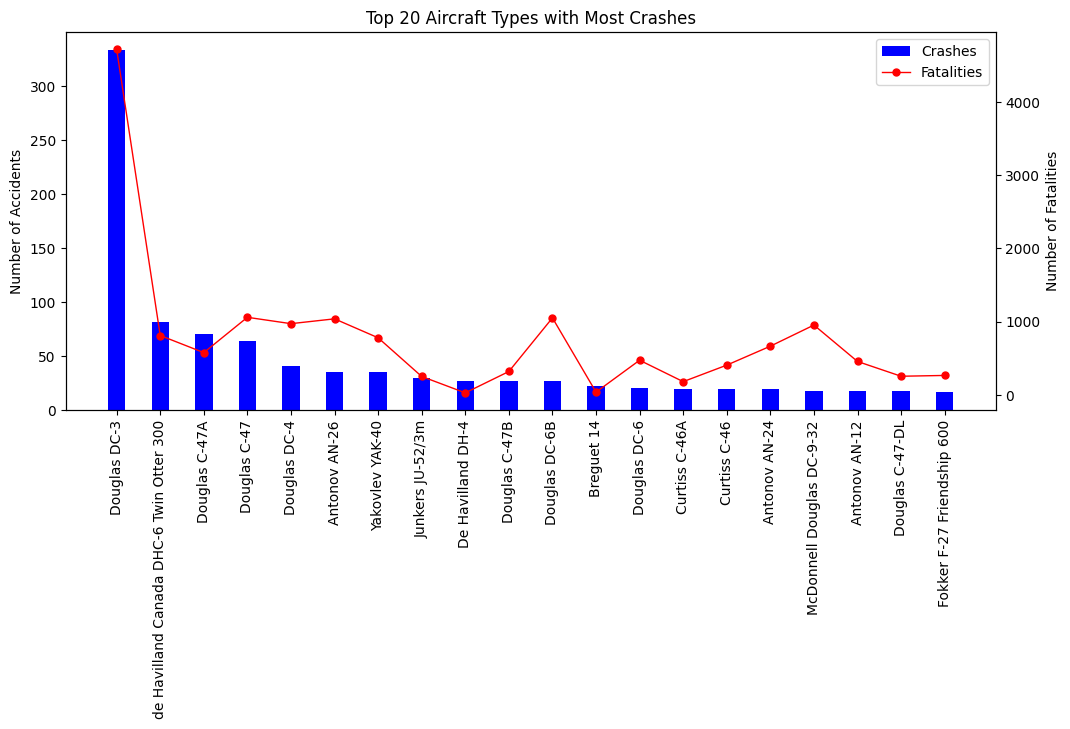

In [74]:
# Calculate the amount of crashes by aircraft type
type_counts = df['type'].value_counts()

# Select the top 20 aircraft types with the most crashes
top_20_types = type_counts.head(20)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the bar for crashes on the left y-axis
ax1.bar(top_20_types.index, top_20_types.values, width=0.4, align='center', color='blue', label='Crashes')
ax1.set_ylabel('Number of Accidents')

# Create a twin y-axis for fatalities
ax2 = ax1.twinx()

# Group the data by aircraft type and calculate the sum of total_fatalities_aboard
fatalities_by_type = df.groupby('type')['total_fatalities'].sum()

# Plot the line for fatalities on the right y-axis
ax2.plot(fatalities_by_type.loc[top_20_types.index], color='red', marker='o', markersize=5, linewidth=1, label='Fatalities')
ax2.set_ylabel('Number of Fatalities')

# Set the x-axis ticks and labels
ax1.set_xticks(range(len(top_20_types.index)))
ax1.set_xticklabels(top_20_types.index, rotation=90)

# Set the title
ax1.set_title('Top 20 Aircraft Types with Most Crashes')

# Combine the legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Adjust the spacing between bars on the x-axis
plt.subplots_adjust(bottom=0.25)

# Display the graph
plt.show()